In [10]:
import magnetic_boundaries as mb
import numpy as np
from scipy.ndimage import gaussian_filter
from math import pi
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, linalg as sla
import matplotlib.colors as mcolors

# Graphene

In [12]:
parameters = {
    'width' : 150, # This is in units of 3a
    'bottom_bearded' : False,
    'top_bearded' : False,
    #'mag_field' : 0.005
    'mag_field' : 0.0015
             }
#Calculate bands
momenta, bands = mb.graphene_bands(parameters, npoints = 501)

/tmp/ipykernel_15941/1804490678.py:30: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[0]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
/tmp/ipykernel_15941/1804490678.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[1]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
/tmp/ipykernel_15941/1804490678.py:37: UserWarni

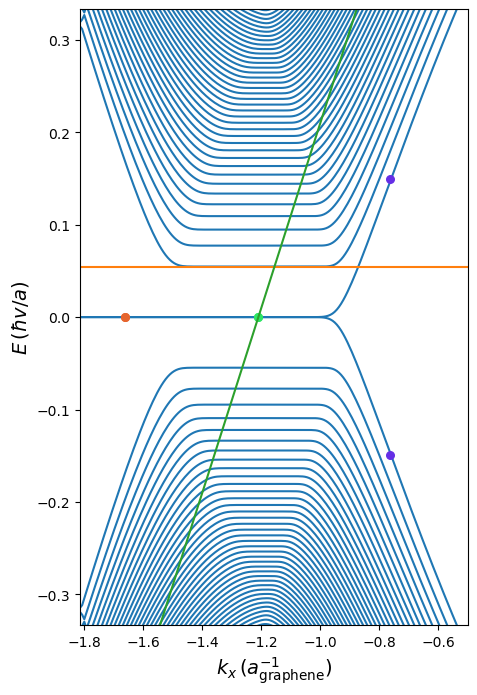

In [14]:
#Define color palette
rgb_colors = []
nplots = 3

for i in range(nplots):
    # Define HSV color
    hsv_color = (0.05+i/nplots, 0.8, 0.9) 
    # Convert to RGB
    rgb_colors.append(mcolors.hsv_to_rgb(hsv_color))

#Plot bands
fig = plt.figure(figsize = (5,8))
ax = fig.add_subplot(111)
for i in range(bands.shape[1]):
    ax.plot(momenta,bands[:,i], c = 'C0')

ax.set_ylim(-0.5/3*2,0.5/3*2)
ax.set_xlim(-pi/np.sqrt(3),-0.5)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a^{-1}_{\text{graphene}})$',fontsize = 14)

#Pintpoint states to plot
for i,shift in enumerate(np.linspace(-0.45,0.45,nplots)):

    #Calculate eignestates at kplot and plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    ax.scatter([momenta[k_idx]],[energies[0]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    ax.scatter([momenta[k_idx]],[energies[1]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    # ax.scatter([momenta[k_idx]],[energies[2]*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')

ax.axhline(np.sqrt(2*parameters['mag_field']), c = 'C1')######################################################## These lines are useful to check units
ax.axline((-2*pi/np.sqrt(3)/3,0), slope=1, color='C2', label='by slope')########################################
    
fig.show()


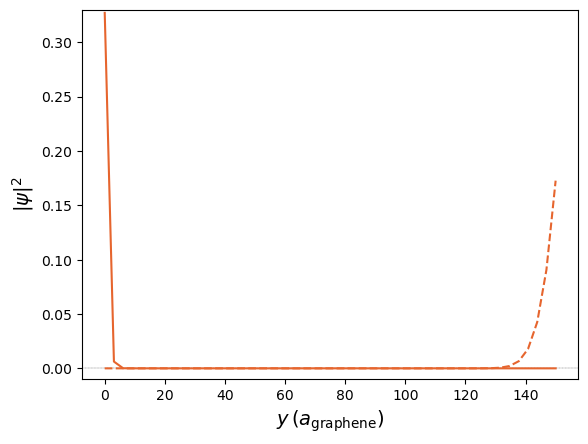

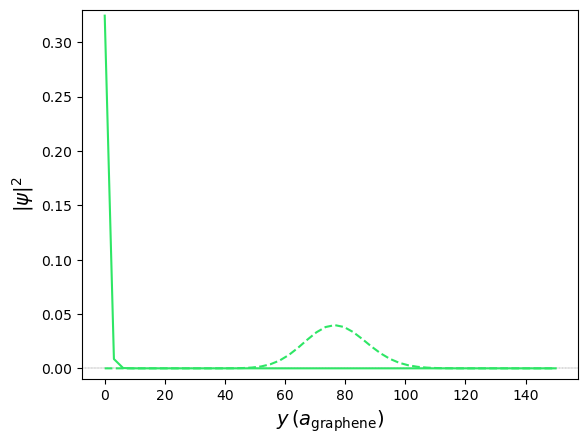

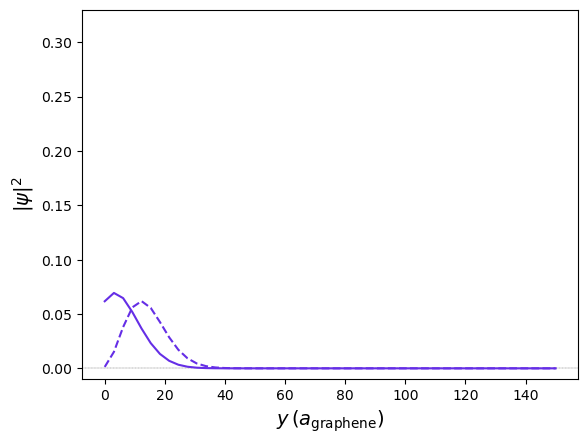

In [4]:
for i,shift in enumerate(np.linspace(-0.45,0.45,nplots)):
    #Plot state
    figstate = plt.figure()
    axstate = figstate.add_subplot(111)
    space = np.linspace(0,3*parameters['width'],parameters['width'])
    axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
    axstate.set_ylabel(r'$|\psi|^2$',fontsize = 14)
    axstate.set_xlabel(r'$y\,(a_{\text{graphene}})$',fontsize = 14)
    axstate.set_ylim(-0.01, 0.33)

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    axstate.plot(space,np.abs(psi[0,:,0])**2/3 + np.abs(psi[2,:,0])**2/3+np.abs(psi[0,:,1])**2/3 + np.abs(psi[2,:,1])**2/3,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    axstate.plot(space,np.abs(psi[1,:,0])**2/3 + np.abs(psi[3,:,0])**2/3+np.abs(psi[1,:,1])**2/3 + np.abs(psi[3,:,1])**2/3,c = rgb_colors[i]) ## sublattice b
    #axstate.plot(space,np.sum(np.abs(psi[:,:,0])**2/3+np.abs(psi[:,:,1])**2/3,axis = 0), c = rgb_colors[i])
    #axstate.set_ylim(-0.02,0.35)

/tmp/ipykernel_15941/1252168506.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[0]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
/tmp/ipykernel_15941/1252168506.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([momenta[k_idx]],[energies[1]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')


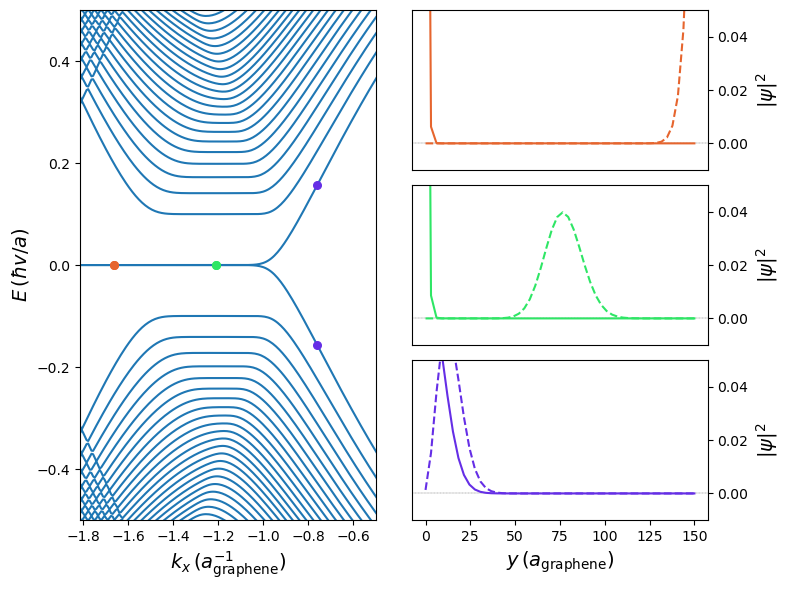

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Create figure
fig = plt.figure(figsize=(8, 6))  # Square figure

# Define grid layout: 2 columns, 3 rows
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1])

# Create subplots
ax = fig.add_subplot(gs[:, 0])
for i in range(bands.shape[1]):
    ax.plot(momenta,bands[:,i], c = 'C0')

ax.set_ylim(-0.5,0.5)
ax.set_xlim(-pi/np.sqrt(3),-0.5)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a^{-1}_{\text{graphene}})$',fontsize = 14)

#Pintpoint states to plot
for i,shift in enumerate(np.linspace(-0.45,0.45,nplots)):

    #Calculate eignestates at kplot and plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    ax.scatter([momenta[k_idx]],[energies[0]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    ax.scatter([momenta[k_idx]],[energies[1]], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')
    # ax.scatter([momenta[k_idx]],[energies[2]*3/2], c= rgb_colors[i], s = 30,zorder = 2, label = 'Plotted state')

for i,shift in enumerate(np.linspace(-0.45,0.45,nplots)):
    #Plot state
    axstate = fig.add_subplot(gs[i, 1])  # Top-right
    space = np.linspace(0,3*parameters['width'],parameters['width'])
    axstate.axhline(0, ls ='--', c ='k',lw = 0.2)
    axstate.set_ylabel(r'$|\psi|^2$',fontsize = 14)
    axstate.set_ylim(-0.01, 0.05)
    if i == nplots-1:
        axstate.set_xlabel(r'$y\,(a_{\text{graphene}})$',fontsize = 14)
    else:
        axstate.xaxis.set_visible(False)

    axstate.yaxis.set_ticks_position("right")  # Move ticks to the right
    axstate.yaxis.set_label_position("right")  # Move labels to the right

    #Calculate eignestates at kplot and choose which one to plot.
    kplot = -2*pi/np.sqrt(3)/3+shift
    k_idx = (np.abs(momenta - kplot)).argmin()
    energies, psi = mb.graphene_states(parameters,kplot)

    axstate.plot(space,np.abs(psi[0,:,0])**2/3 + np.abs(psi[2,:,0])**2/3+np.abs(psi[0,:,1])**2/3 + np.abs(psi[2,:,1])**2/3,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    axstate.plot(space,np.abs(psi[1,:,0])**2/3 + np.abs(psi[3,:,0])**2/3+np.abs(psi[1,:,1])**2/3 + np.abs(psi[3,:,1])**2/3,c = rgb_colors[i]) ## sublattice b

    # axstate.plot(space,np.abs(psi[0,:,0])**2/3 + np.abs(psi[2,:,0])**2/3,c = rgb_colors[i], ls = 'dashed') ## sublattice a
    # axstate.plot(space,np.abs(psi[1,:,0])**2/3 + np.abs(psi[3,:,0])**2/3,c = rgb_colors[i]) ## sublattice b
    
    #axstate.plot(space,np.sum(np.abs(psi[:,:,0])**2/3+np.abs(psi[:,:,1])**2/3,axis = 0), c = rgb_colors[i])
    #axstate.set_ylim(-0.02,0.35)

# Show the figure
plt.tight_layout()
plt.show()

#fig.savefig("graphene_zb.pdf", bbox_inches="tight")


# Tangent fermions

In [32]:
mag_field = 0.0008
width = 150 # In units of 3a to compare with graphene
fluxes = mag_field*np.ones((3*width,1))
a_e, a_n = mb.vector_potential(1,3*width,fluxes, gauge = "Landau")

parameters_tan = dict(
    Lx = 1,
    Ly = 3*width,
    theta_top = 0,
    theta_bot = pi,
    a_e = a_e,
    a_n = a_n,
    mass = 0,
)


nbands = 50
momenta_tan, bands_tan = mb.make_bands_x(parameters_tan,number_of_bands = nbands, number_of_points = int(500), kmin = -pi/np.sqrt(3), kmax = pi/np.sqrt(3))

/tmp/ipykernel_14610/1293152576.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


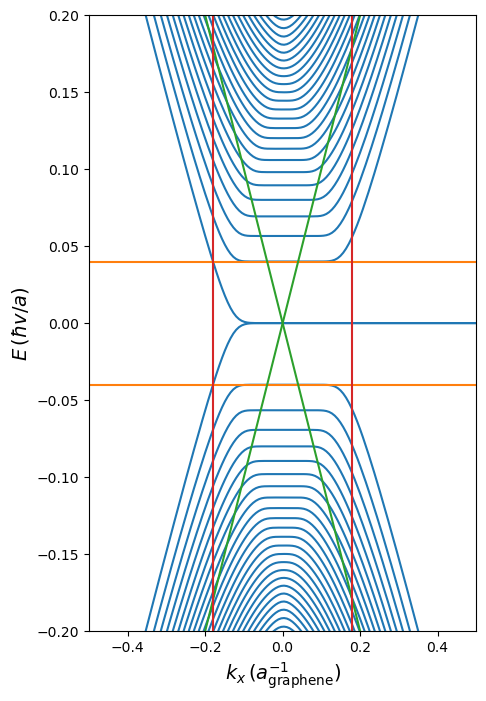

In [33]:
#Plot bands
fig = plt.figure(figsize = (5,8))
ax = fig.add_subplot(111)
for i in range(bands_tan.shape[1]):
    ax.plot(momenta_tan,bands_tan[:,i], c = 'C0')

ax.set_ylim(-0.2,0.2)
ax.set_xlim(-0.5,0.5)
ax.set_ylabel(r'$E\,(\hbar v/a)$',fontsize = 14)
ax.set_xlabel(r'$k_x\,(a^{-1}_{\text{graphene}})$',fontsize = 14)


######These lines are useful to check units
ax.axhline(np.sqrt(2*mag_field), c = 'C1')########################################################  First Landau level
ax.axhline(-np.sqrt(2*mag_field), c = 'C1')########################################################
ax.axline((0,0), slope=1, color='C2', label='by slope')######################################## Fermi velocity slope
ax.axline((0,0), slope=-1, color='C2', label='by slope')########################################
ax.axvline(parameters_tan['Ly']*mag_field/2, c = 'C3')######################## Skipping orbits centered the edge of the ribbon
ax.axvline(-parameters_tan['Ly']*mag_field/2, c = 'C3')#######################
    
    
fig.show()

# We can put both of them together